# 연습1
<!-- 8-1 -->


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import datasets
X,y = datasets.fetch_openml('boston', return_X_y=True)
boston = pd.concat([y,X], axis = 1)
boston_df = boston[["MEDV", "RM", "NOX", "AGE", "LSTAT"]]
boston_df.rename(columns={"MEDV":"PRICE"}, inplace=True)
boston_df.head()

c:\Users\jjjeo\anaconda3\envs\tf2\lib\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
C:\Users\jjjeo\AppData\Local\Temp\ipykernel_3504\39842923.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df.rename(columns={"MEDV":"PRICE"}, inplace=True)


,PRICE,RM,NOX,AGE,LSTAT
0,24.0,6.575,0.538,65.2,4.98
1,21.6,6.421,0.469,78.9,9.14
2,34.7,7.185,0.469,61.1,4.03
3,33.4,6.998,0.458,45.8,2.94
4,36.2,7.147,0.458,54.2,5.33


In [9]:
# 단순회귀분석 적합
# 반응변수 y : Price(주택 가격)
# 설명변수 X : RM(주택 1가구당 평균 방의 개수)
model = sm.OLS.from_formula("PRICE ~ RM", data=boston_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           2.49e-74
Time:                        10:18:32   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

Text(0, 0.5, 'y_resi')

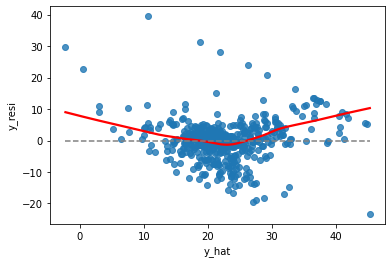

In [10]:
#%%
# 잔차그림을 이용한 적합값(y_hat)과 잔차(y_resi)를 비교하여 모형의 선형성 확인
y_hat = result.predict(boston_df)
y_true = boston_df['PRICE']
y_resi = y_true - y_hat
sns.regplot(x = y_hat, y = y_resi, lowess=True, line_kws={'color' : 'red'})
plt.plot([y_hat.min(), y_hat.max()], [0, 0], '--', color='grey')
plt.xlabel('y_hat')
plt.ylabel('y_resi')

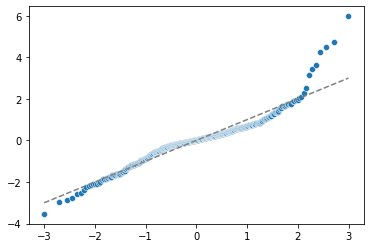

In [11]:
# qqplot을 이용한 정규성 확인
import scipy.stats
standard_resi = scipy.stats.zscore(y_resi)
(x, y), _ = scipy.stats.probplot(standard_resi)
sns.scatterplot(x = x, y = y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

Text(0, 0.5, 'sqrt of standardized resid')

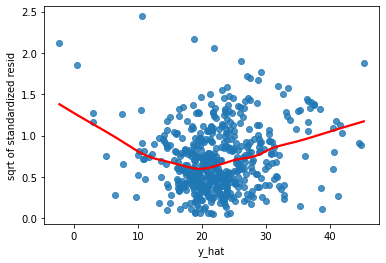

In [12]:
#%%
# 잔차그림을 이용한 등분산성 검정
sns.regplot(x = y_hat, y = np.sqrt(np.abs(standard_resi)), lowess=True, line_kws={'color' : 'red'})
plt.xlabel('y_hat')
plt.ylabel('sqrt of standardized resid')

In [13]:
# 단순회귀분석 적합
# 반응변수 y : Price(주택 가격)
# 설명변수 X : RM(주택 1가구당 평균 방의 개수)
model = sm.OLS.from_formula("PRICE ~ RM", data=boston_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           2.49e-74
Time:                        10:18:36   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

Text(0, 0.5, 'y_resi')

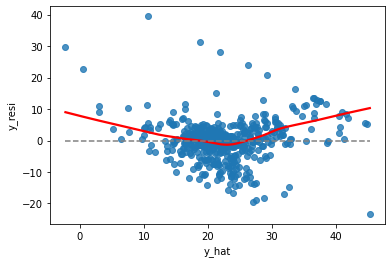

In [14]:
#%%
# 잔차그림을 이용한 적합값(y_hat)과 잔차(y_resi)를 비교하여 모형의 선형성 확인
y_hat = result.predict(boston_df)
y_true = boston_df['PRICE']
y_resi = y_true - y_hat
sns.regplot(x = y_hat, y = y_resi, lowess=True, line_kws={'color' : 'red'})
plt.plot([y_hat.min(), y_hat.max()], [0, 0], '--', color='grey')
plt.xlabel('y_hat')
plt.ylabel('y_resi')

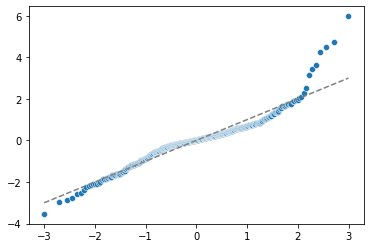

In [15]:
# qqplot을 이용한 정규성 확인
import scipy.stats
standard_resi = scipy.stats.zscore(y_resi)
(x, y), _ = scipy.stats.probplot(standard_resi)
sns.scatterplot(x = x, y = y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

Text(0, 0.5, 'sqrt of standardized resid')

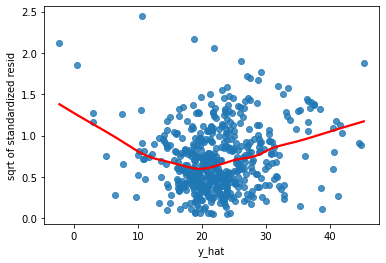

In [16]:
#%%
# 잔차그림을 이용한 등분산성 검정
sns.regplot(x = y_hat, y = np.sqrt(np.abs(standard_resi)), lowess=True, line_kws={'color' : 'red'})
plt.xlabel('y_hat')
plt.ylabel('sqrt of standardized resid')